In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['ocean_proximity'].value_counts()
df_c=df.drop('ocean_proximity',axis=1)


In [5]:
df_c=df_c.columns
df_c

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


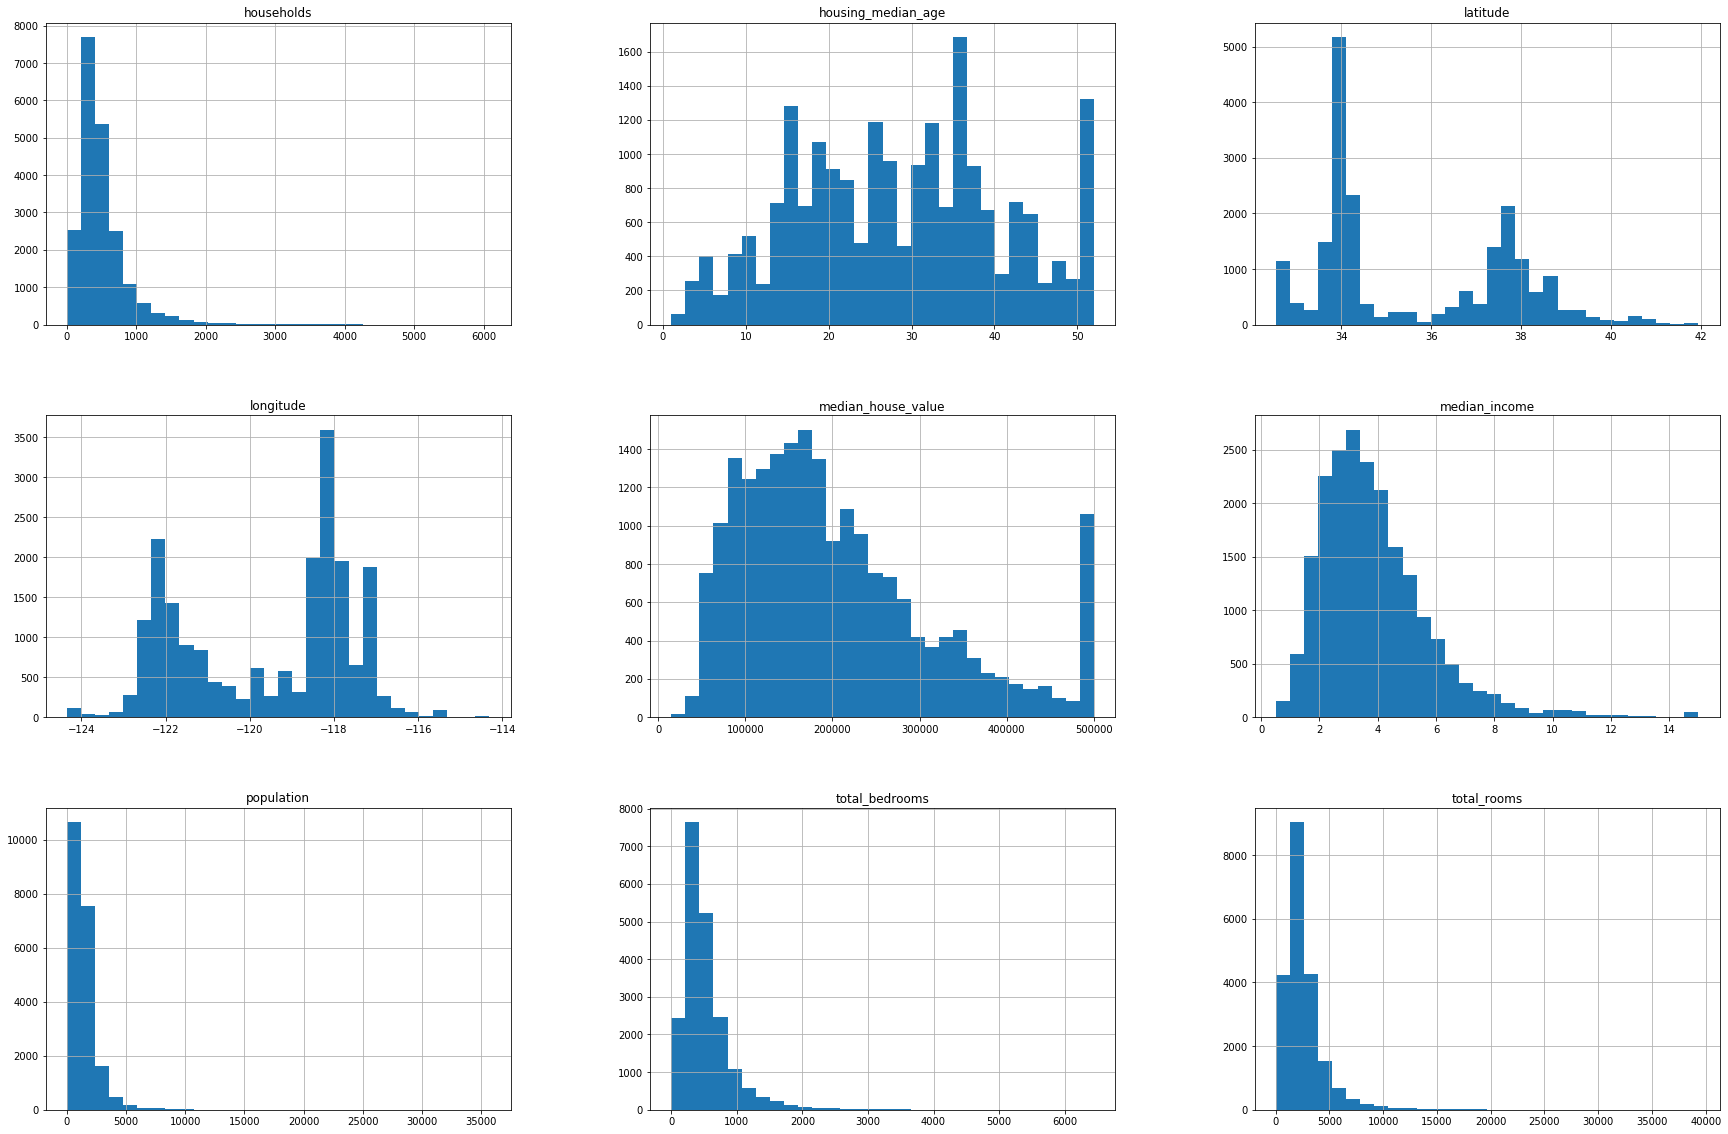

In [7]:
df.hist(bins=30,figsize=(30,20))
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_set,tets_set=train_test_split(df,test_size=0.2,random_state=42)

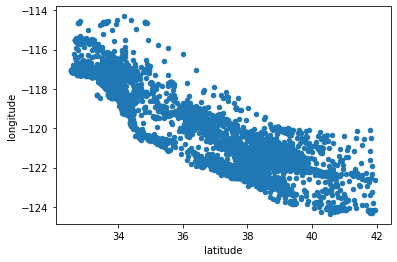

In [9]:
## Visalizing data

df.plot(kind='scatter',x='latitude',y='longitude')
plt.show()

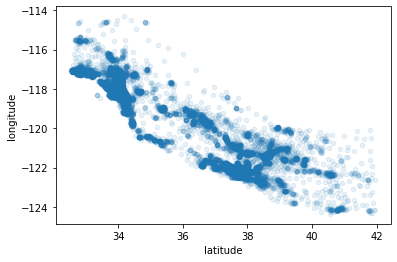

In [10]:
df.plot(kind='scatter',x='latitude',y='longitude',alpha=0.1)
plt.show()

In [11]:
## looking for correlation for subject of interest
corr_matrix=df.corr()
corr_matrix['median_house_value']

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [12]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


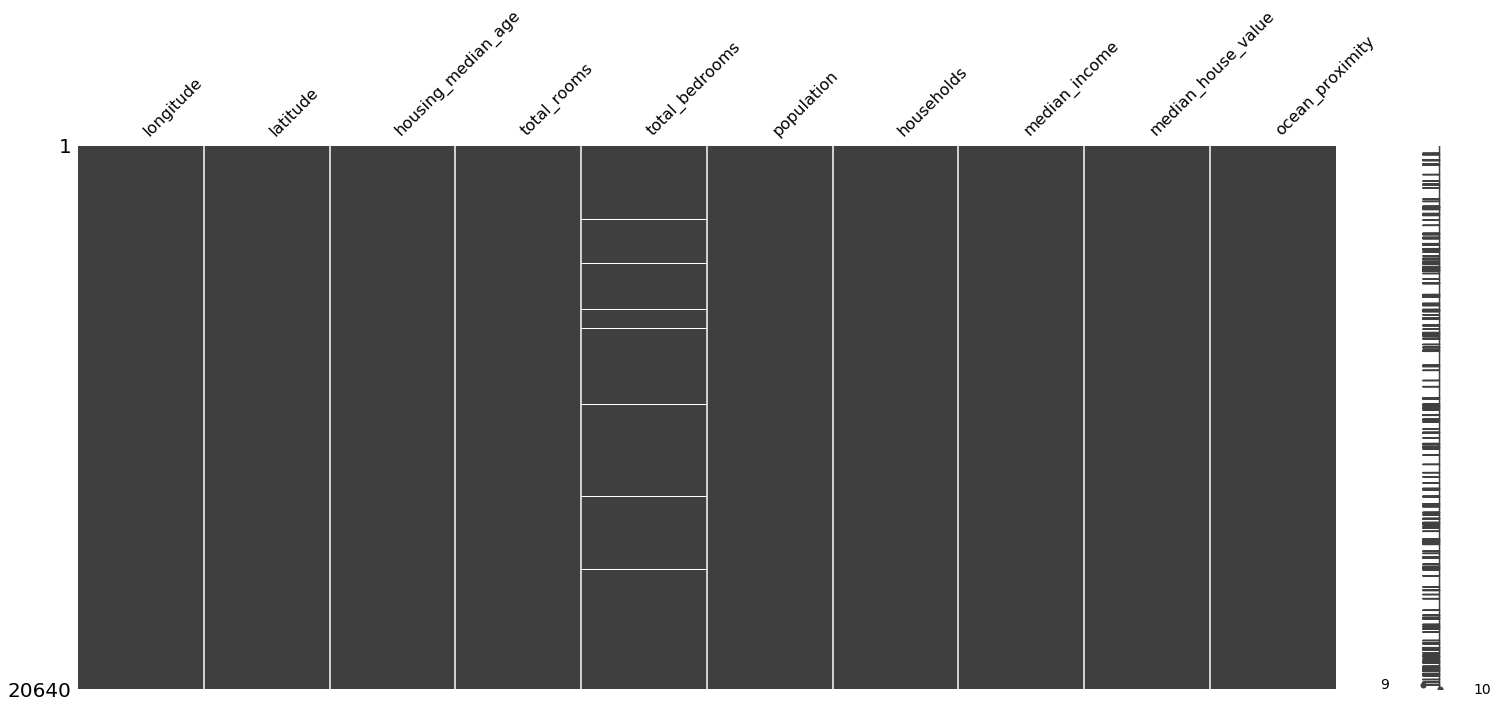

In [13]:
msno.matrix(df)

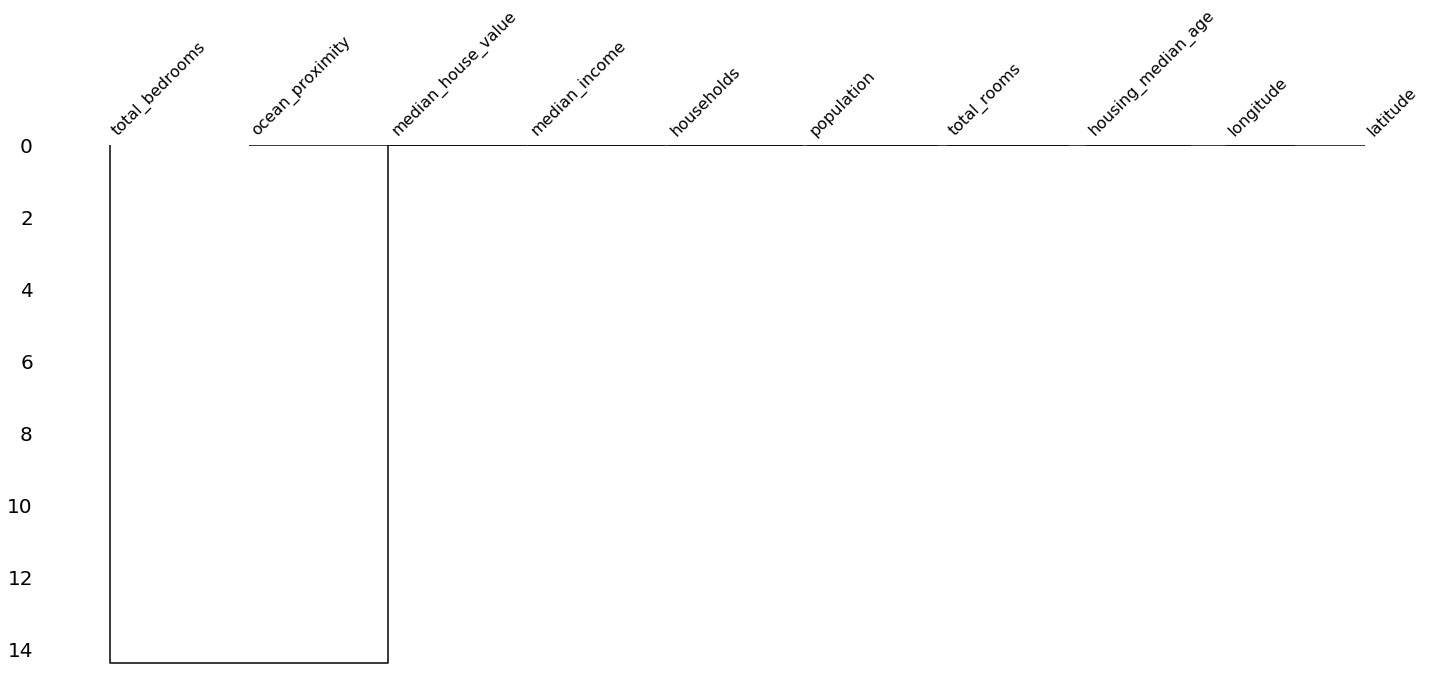

In [14]:
msno.dendrogram(df)

In [15]:
## Data cleaning
from sklearn.preprocessing import Imputer, StandardScaler 
impute=Imputer(strategy='mean')
std=StandardScaler()

## drop the categorical data
housing=df.drop('ocean_proximity',axis=1)

## using imputer
impute.fit(housing)

x=impute.transform(housing)


C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [16]:
y=std.fit_transform(x)

In [17]:
housing_tr=pd.DataFrame(y,columns=df_c)
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900
...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-1.115804
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-1.124470
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.992746
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-1.058608


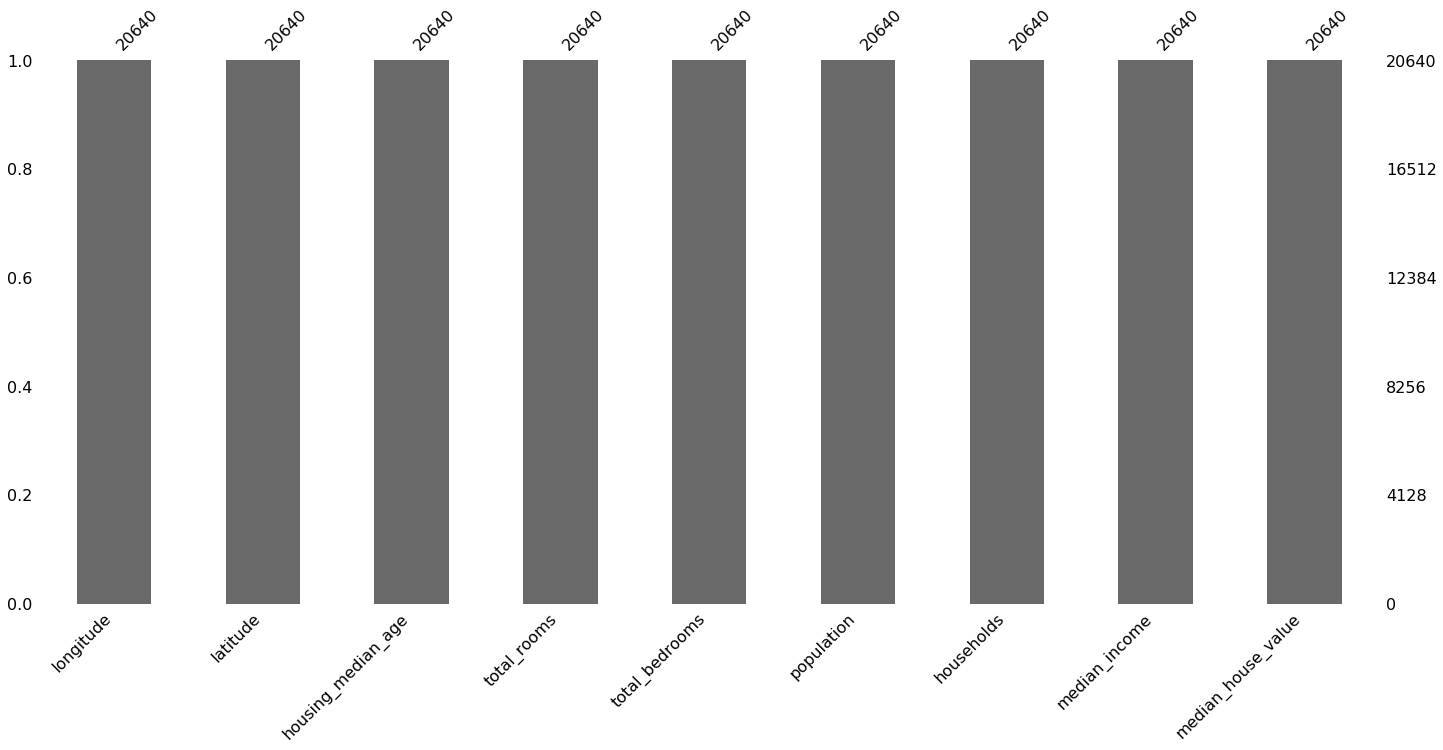

In [18]:
msno.bar(housing_tr)

In [19]:
## encoding categorical data
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
housing_cat=df['ocean_proximity']
housing_en=encoder.fit_transform(housing_cat)
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [20]:
from sklearn.preprocessing import OneHotEncoder
one=OneHotEncoder()
housing_ce=one.fit_transform(housing_en.reshape(-1,1))
##converting it to array
housing_ce=housing_ce.toarray()



In [21]:
## LabelBinazier converts to numpy array
from sklearn.preprocessing import LabelBinarizer
en = LabelBinarizer()
z= en.fit_transform(housing_en)

housing_l=pd.DataFrame(z,columns=encoder.classes_)
housing_l


,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [22]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [23]:
housing_prepared=pd.concat([housing_tr,housing_l],axis=1)
housing_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-1.115804,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-1.124470,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.992746,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-1.058608,0,1,0,0,0


In [24]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler

In [25]:
house_cat=df['ocean_proximity']
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [26]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attributesname):
        self.attributesname=attributesname
    def fit(self,x,y=None):
        return self
    def transform(self,x):
        return x[self.attributesname].values
        

In [27]:
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import StandardScaler

In [28]:
num_pipeline=Pipeline([('selector',DataFrameSelector(housing)),
               ('imputer',Imputer(strategy='Median')),
               ('standaradscaler',StandardScaler())])

C:\Users\kkbal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [29]:
cat_pipeline=Pipeline([('select',DataFrameSelector(house_cat)),('cat_converter',LabelBinarizer())])


In [30]:
total_pipeline=FeatureUnion(transformer_list=[('num_pipeline',num_pipeline),('cat_pipeline',cat_pipeline)])

In [31]:
housing_prepared=housing_prepared.drop(['median_house_value'],axis=1)

In [32]:
predicting=df['median_house_value'].values
predicting

array([452600., 358500., 352100., ...,  92300.,  84700.,  89400.])

In [33]:
## predicting using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(housing_prepared,predicting,test_size=0.20,random_state=42)
linear=LinearRegression()
linear.fit(x_train,y_train)
some_2=x_train[:5]

In [34]:
linear.predict(some_2)

array([188628.0772436 , 290379.8948687 , 250985.48476349, 146878.07878194,
       165789.41368924])

In [35]:
from sklearn.metrics import mean_squared_error
a=linear.predict(x_train)
lns=mean_squared_error(y_train,a)
lnrs=np.sqrt(lns)
lnrs

68433.93736666226

In [36]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
q=tree.fit(x_train,y_train)
p=tree.predict(x_train)
l=mean_squared_error(y_train,p)
lns=np.sqrt(l)
lns

0.0

In [37]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(tree,x_train,y_train,cv=10)
print(cv)


[0.66448288 0.66892055 0.66629189 0.60866455 0.6590815  0.67693211
 0.69265402 0.62478654 0.65219493 0.6521075 ]


In [40]:
e=cross_val_score(linear,x_train,y_train,cv=10)
print(e)
scores_q(e)

[0.67879183 0.63217854 0.65223844 0.64493131 0.63888288 0.68265384
 0.66552723 0.62771705 0.60631577 0.64556482]
scores [0.67879183 0.63217854 0.65223844 0.64493131 0.63888288 0.68265384
 0.66552723 0.62771705 0.60631577 0.64556482]
mean 0.6474801707218913
std 0.04458363950036885


In [39]:
def scores_q(cv):
    print('scores',cv)
    print('mean',cv.mean())
    print('std',cv.std()*2)

scores_q(cv)


scores [0.66448288 0.66892055 0.66629189 0.60866455 0.6590815  0.67693211
 0.69265402 0.62478654 0.65219493 0.6521075 ]
mean 0.6566116450422671
std 0.04637586662430199


In [41]:
ls=cross_val_score(linear,x_train,y_train,cv=10)
ls
scores_q(ls)

scores [0.67879183 0.63217854 0.65223844 0.64493131 0.63888288 0.68265384
 0.66552723 0.62771705 0.60631577 0.64556482]
mean 0.6474801707218913
std 0.04458363950036885


In [42]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
s=reg.fit(x_train,y_train)
p=reg.predict(x_train)
rmse=mean_squared_error(y_train,p)
rmse_1=np.sqrt(rmse)
rmse_1

21360.954026238844

In [43]:
s=cross_val_score(reg,x_train,y_train,cv=10)
print(s)

[0.81992433 0.80432064 0.80904939 0.77067979 0.79812099 0.81792994
 0.82456565 0.77934158 0.79514622 0.80116358]


In [44]:
scores_q(s)

scores [0.81992433 0.80432064 0.80904939 0.77067979 0.79812099 0.81792994
 0.82456565 0.77934158 0.79514622 0.80116358]
mean 0.8020242104622
std 0.03284147813149321


In [45]:
from sklearn.model_selection import GridSearchCV 

param_grid=[
    {'n_estimators':[3,10,30],'max_features':
             [2,4,6,8]},{'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}]
reg_1=RandomForestRegressor()

grid=GridSearchCV(reg_1,param_grid,cv=5)
c=grid.fit(x_train,y_train)
best_params=grid.best_params_
best_params

{'max_features': 6, 'n_estimators': 30}

In [46]:
best_est=grid.best_estimator_
best_est

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [47]:
cv=grid.cv_results_
cv
for mean_score,params in zip(cv['mean_test_score'],cv['params']):
    print(np.sqrt(mean_score),params)

0.8411823669747086 {'max_features': 2, 'n_estimators': 3}
0.881146932316759 {'max_features': 2, 'n_estimators': 10}
0.8921330140202631 {'max_features': 2, 'n_estimators': 30}
0.8506806960834316 {'max_features': 4, 'n_estimators': 3}
0.8917535764428538 {'max_features': 4, 'n_estimators': 10}
0.90066871225201 {'max_features': 4, 'n_estimators': 30}
0.8614884347784847 {'max_features': 6, 'n_estimators': 3}
0.8932560371790301 {'max_features': 6, 'n_estimators': 10}
0.9036492679523831 {'max_features': 6, 'n_estimators': 30}
0.863023246915673 {'max_features': 8, 'n_estimators': 3}
0.8944332615647423 {'max_features': 8, 'n_estimators': 10}
0.9036461923213308 {'max_features': 8, 'n_estimators': 30}
0.8475947034859028 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.8829666971977114 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.8545524519421863 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.8909991870310346 {'bootstrap': False, 'max_features': 3, 'n_est

In [49]:
## final model on test data:
final_model=grid.best_estimator_
x=final_model.predict(x_test)
rmse=mean_squared_error(y_test,x)
rmse
np.sqrt(rmse)

49649.157153547574